# Análise Exploratória De Dados: Menu Nutrition Dataset

Caderno de **Portifolio** <br/>
[Marcos Vinicius](https://www.linkedin.com/in/marcosvmanjos/) - [Github](https://github.com/marcos-anjos)

**Data From**: [Kaggle | Menu Nutrition Dataset](https://www.kaggle.com/datasets/deepcontractor/mcdonalds-india-menu-nutrition-facts)

---

#### Bibliotecas

In [3]:
import pandas as pd # Biblioteca de manipulação de dados em Python
import matplotlib.pyplot as plt # Matplotlib é uma biblioteca de plotagem 2D para Python
import seaborn as sns # Seaborn é uma biblioteca de visualização de dados estatísticos baseada no Matplotlib
import numpy as np # cálculos numéricos em Python

In [4]:
data = pd.read_csv('India_Menu.csv') # Visualização do DataFrame

### 1\. Descrição dos dados

In [34]:
data.dtypes # lista dos tipos de dados de cada coluna no conjunto de dados

Menu Category              object
Menu Items                 object
Per Serve Size             object
Energy (kCal)             float64
Protein (g)               float64
Total fat (g)             float64
Sat Fat (g)               float64
Trans fat (g)             float64
Cholesterols (mg)         float64
Total carbohydrate (g)    float64
Total Sugars (g)          float64
Added Sugars (g)          float64
Sodium (mg)               float64
dtype: object

In [35]:
data.head() # visualizar as primeiras 5 linhas do conjunto de dados

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [36]:
data.shape # obter as dimensões do conjunto de dados

(141, 13)

In [37]:
data.info() # obter uma visão geral das informações sobre o conjunto de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


> No conjunto de dados, há um total de 141 itens de menu disponíveis para extração e análise nutricional. Destes, três são características categóricas, nomeadamente Categoria do menu, Itens do menu e Tamanho por dose, enquanto as restantes são características numéricas. É importante notar que há uma ocorrência de dado em falta em relação ao sódio.

---

### 2\. Limpeza dos Dados

In [39]:
data.isnull().sum() # é usado para calcular o número de valores nulos em cada coluna do conjunto de dados.

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [42]:
data['Sodium (mg)'].fillna(data['Sodium (mg)'].mean(), inplace=True) # preencher os valores nulos com a média dos valores não nulos dessa mesma coluna. 

> Manter a integridade dos dados sem introduzir grandes distorções nos resultados finais da análise.

In [44]:
data.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
dtype: int64

In [48]:
valores_duplicados = data.duplicated().sum() # verificar valores duplicados em todo o DataFrame
print("Total de valores duplicados em todo o DataFrame:", valores_duplicados)

Total de valores duplicados em todo o DataFrame: 0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             141 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


> Durante a etapa de limpeza dos dados, preenchemos um valor nulo na coluna "Sodium (mg)" utilizando a média dos valores não nulos da mesma coluna. Após essa correção, verificamos a ausência de valores duplicados em todo o conjunto de dados. Concluímos que o DataFrame é composto por 141 entradas e 13 colunas, sendo 10 do tipo float64 e 3 do tipo object.

---

### 3\. Análise Exploratória de Dados

- **Qual é o número de itens por categoria e valor médio nutricional por categoria?**

In [6]:
data.groupby('Menu Category').count()[['Menu Items']] #  agrupa os dados por categoria de menu e conta o número de itens em cada categoria. 

,Menu Items
Menu Category,
Beverages Menu,17
Breakfast Menu,15
Condiments Menu,9
Desserts Menu,2
Gourmet Menu,11
McCafe Menu,51
Regular Menu,36


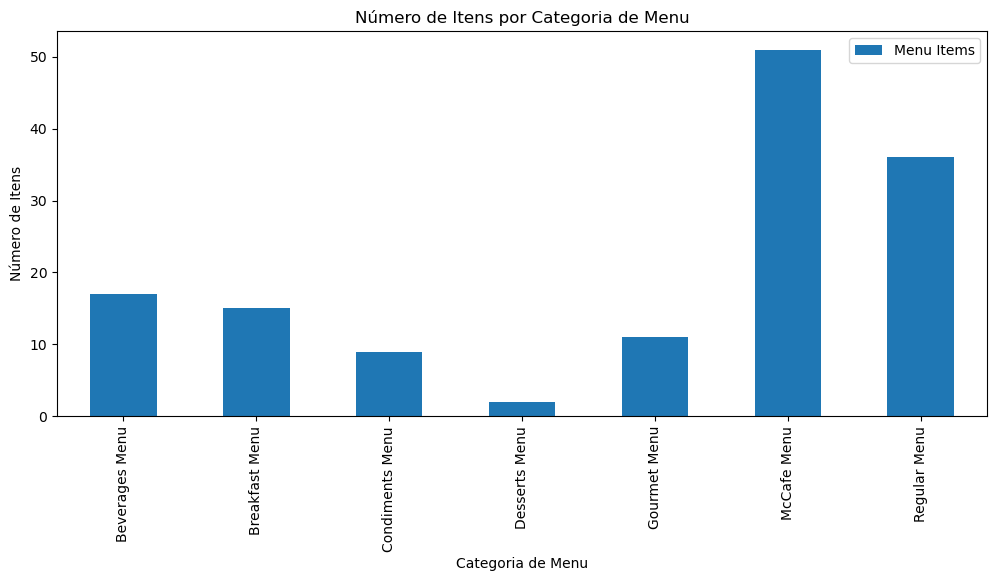

In [7]:
# Agrupar os dados por categoria de menu e contar o número de itens em cada categoria
menu_counts = data.groupby('Menu Category').count()[['Menu Items']]

# Plotar o gráfico de barras
menu_counts.plot(kind='bar', figsize=(12, 5))

# Definir os rótulos dos eixos
plt.xlabel('Categoria de Menu')
plt.ylabel('Número de Itens')

plt.title('Número de Itens por Categoria de Menu')

# Exibir o gráfico
plt.show()

In [8]:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

media_por_categoria = numeric_columns.groupby(data['Menu Category']).mean()

print(media_por_categoria)

                 Energy (kCal)  Protein (g)  Total fat (g)  Sat Fat (g)  \
Menu Category                                                             
Beverages Menu      143.326471     0.268235       0.308824     0.225882   
Breakfast Menu      181.290000     7.636667       7.735333     4.354000   
Condiments Menu      47.473333     0.731111       3.876667     0.572222   
Desserts Menu       162.875000     2.815000       5.255000     3.160000   
Gourmet Menu        543.497273    21.684545      27.671818    11.987273   
McCafe Menu         183.679608     4.295490       5.945686     4.558824   
Regular Menu        367.737778    12.990833      17.625833     7.213333   

                 Trans fat (g)  Cholesterols (mg)  Total carbohydrate (g)  \
Menu Category                                                               
Beverages Menu        0.008824           0.829412               34.851765   
Breakfast Menu        0.146000          61.010667               21.074000   
Condiments Menu 

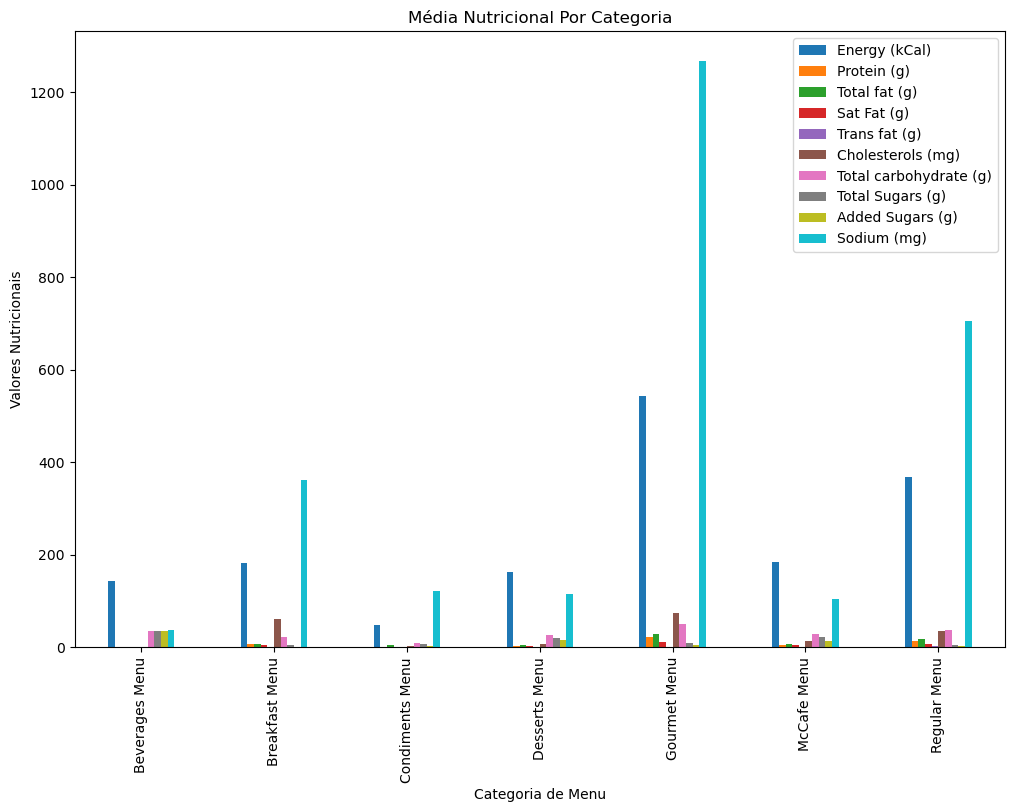

In [14]:
media_por_categoria.plot(kind='bar', figsize=(12, 8))

plt.xlabel('Categoria de Menu')
plt.ylabel('Valores Nutricionais')

plt.title('Média Nutricional Por Categoria')

plt.show()

> - "McCafe Menu" possui o maior número de itens, com um total de 51, enquanto a categoria "Desserts Menu" possui apenas 2 itens.
>   
> - A categoria "Gourmet Menu" apresenta os maiores valores médios de energia, proteína, gordura total, gordura saturada, gorduras trans, colesterol, carboidratos totais e sódio, indicando uma composição nutricional mais rica em comparação com outras categorias. 
>> - 
A categoria "Breakfast Menu" também tem valores médios consideráveis, especialmente em energia, proteína e colesterol, o que é esperado, já que costuma incluir itens de café da manhã mais substancia . 
>
> - 
A categoria "Beverages Menu" tem valores médios relativamente baixos para a maioria dos nutrientes, exceto para carboidratos totais, o que é consistente com bebidas que geralmente contêm menos calorias e nutrientes em comparação com alimentos sólos. s.

- **Visualize a distribuição de Energy (kCal) para diferentes categorias de menus**

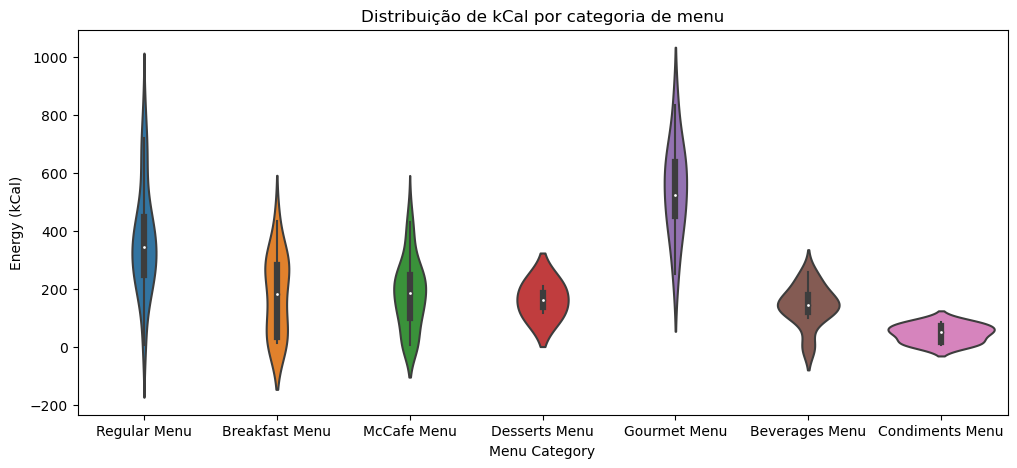

In [15]:
plt.figure(figsize=(12, 5))
sns.violinplot(x='Menu Category', y='Energy (kCal)', data=data)
plt.title('Distribuição de kCal por categoria de menu')

plt.show()

- **Quais colunas contem outlier?**

In [26]:
data.describe()

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
mean,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000
max,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


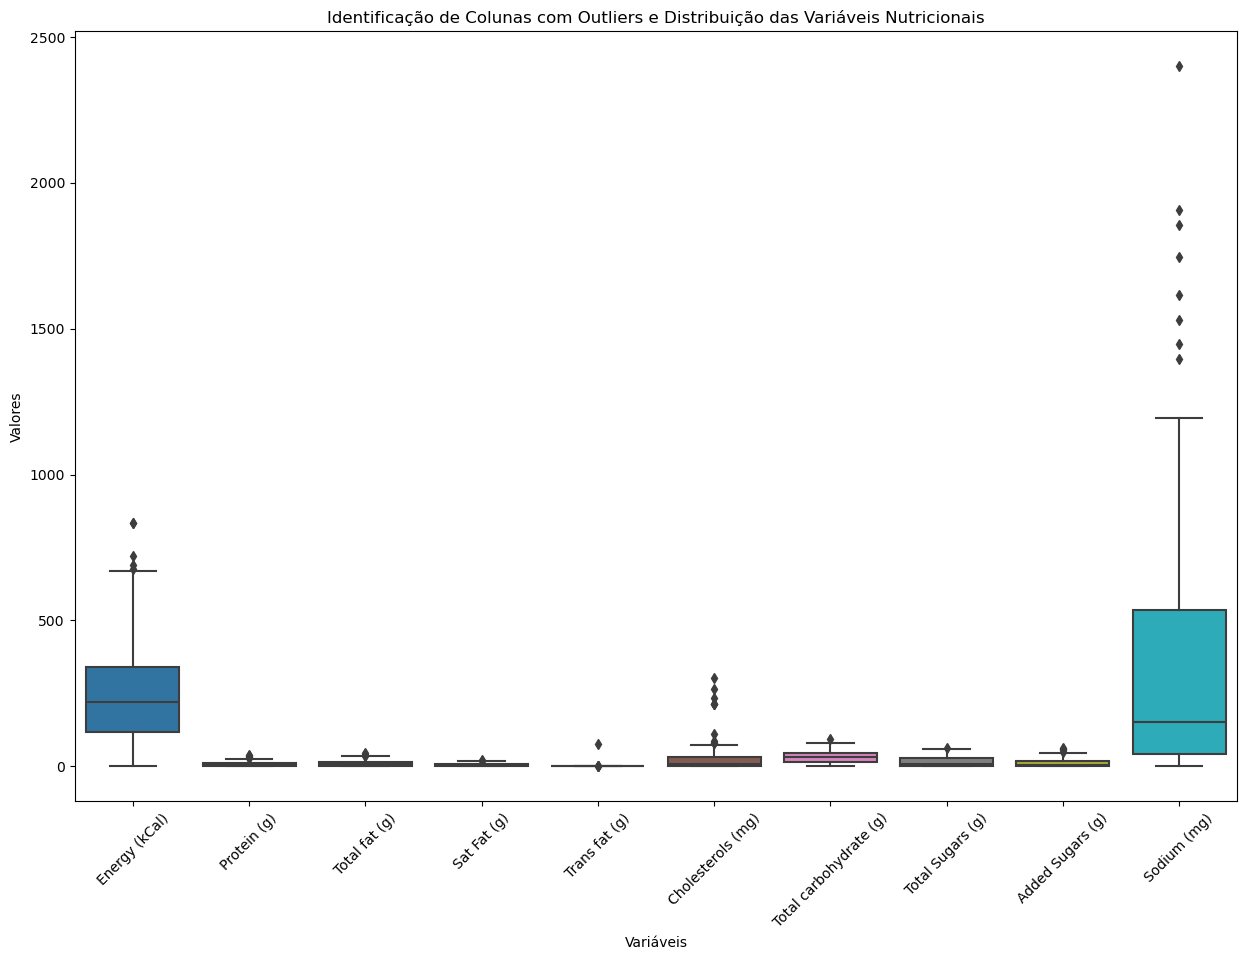

In [30]:
selected_variables = ['Energy (kCal)', 'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 
                      'Trans fat (g)', 'Cholesterols (mg)', 'Total carbohydrate (g)', 
                      'Total Sugars (g)', 'Added Sugars (g)', 'Sodium (mg)']


plt.figure(figsize=(15,10))
sns.boxplot(data=data[selected_variables])
plt.title('Identificação de Colunas com Outliers e Distribuição das Variáveis Nutricionais')
plt.xlabel('Variáveis')
plt.ylabel('Valores')
plt.xticks(rotation=45)  
plt.show()

- **Quais variaveis tem a maior correlação e seus valores correspondentes?**

In [35]:
correlation = data.select_dtypes(include=['float64', 'int64']).corr()
correlation

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
Energy (kCal),1.000000,0.826833,0.908642,0.798445,0.081401,0.379387,0.815603,0.063306,0.003639,0.854730
Protein (g),0.826833,1.000000,0.875594,0.702715,0.189194,0.590031,0.415217,-0.282875,-0.319231,0.914993
Total fat (g),0.908642,0.875594,1.000000,0.843381,0.158400,0.424339,0.538478,-0.220125,-0.280462,0.874911
Sat Fat (g),0.798445,0.702715,0.843381,1.000000,-0.076431,0.363135,0.525837,-0.050434,-0.174230,0.637603
Trans fat (g),0.081401,0.189194,0.158400,-0.076431,1.000000,-0.029681,-0.123237,-0.082297,-0.067124,0.154137
Cholesterols (mg),0.379387,0.590031,0.424339,0.363135,-0.029681,1.000000,0.142834,-0.205699,-0.225601,0.475172
Total carbohydrate (g),0.815603,0.415217,0.538478,0.525837,-0.123237,0.142834,1.000000,0.508707,0.455049,0.499081
Total Sugars (g),0.063306,-0.282875,-0.220125,-0.050434,-0.082297,-0.205699,0.508707,1.000000,0.912168,-0.299171
Added Sugars (g),0.003639,-0.319231,-0.280462,-0.174230,-0.067124,-0.225601,0.455049,0.912168,1.000000,-0.273055
Sodium (mg),0.854730,0.914993,0.874911,0.637603,0.154137,0.475172,0.499081,-0.299171,-0.273055,1.000000


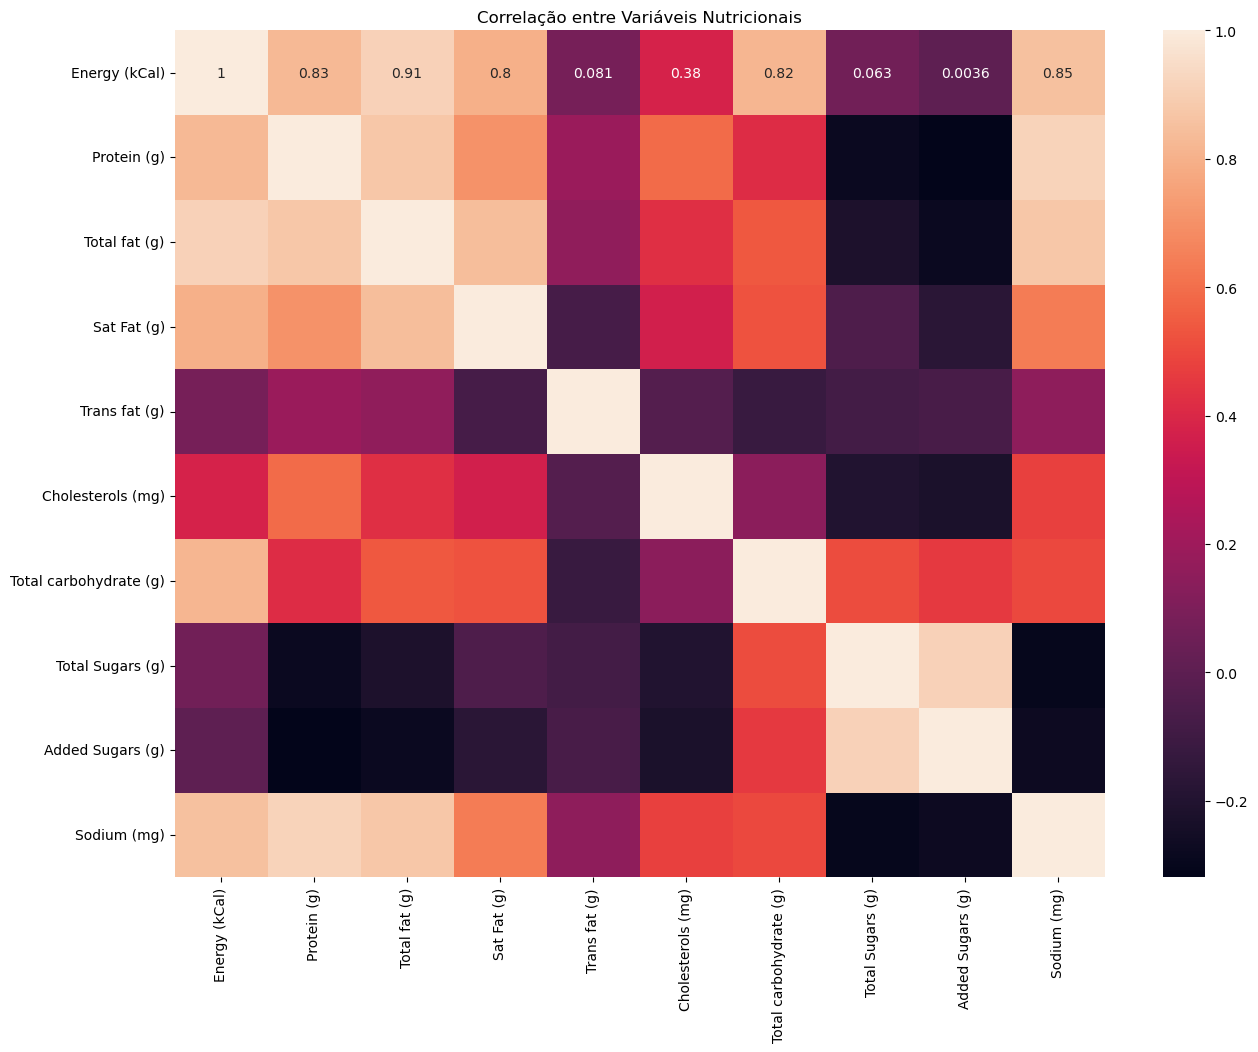

In [39]:
plt.figure(figsize=(15, 11))
sns.heatmap(data=correlation, annot=True)
plt.title('Correlação entre Variáveis Nutricionais')
plt.show()

## Conclusão

<body>
    <p style="text-align: justify;">
        A análise dos dados revela que os itens do "Gourmet Menu" têm, em média, os maiores valores nutricionais, enquanto os do "Beverages Menu" têm os menores. Notavelmente, há uma forte correlação entre a energia (kCal) e a proteína (g), indicando que itens com mais calorias tendem a ter mais proteína. A distribuição da energia por categoria mostra variações significativas, sugerindo opções adequadas para diferentes necessidades dietéticas. Esses insights são valiosos para os consumidores fazerem escolhas alimentares informadas e para a empresa ajustar sua oferta às demandas do mercado.
    </p>
</body>